In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import boxcox
from prepare_data import assign_class, lag

In [3]:
df = pd.read_csv('data/san_francisco_weather_pm25.csv')
df = df[df.PM25 < 500]
df = df[df.PM25 > 0]
df = df.set_index(pd.to_datetime(df['DATE']))
df['YEAR'] = df.index.year
df['WEEKDAY'] = df.DOW.between(0, 4)
df = lag(df, 'PM25', lags=[1, 6, 12, 24])

In [5]:
df = assign_class(df, 'PM25', [35])
df = df.dropna()
columns = ['TMP', 'DEW', 'SPD', 'DIR', 'DOW', 'MONTH', 'HOUR', 'PM25_1']
X = df[columns].values
y = df['class'].values

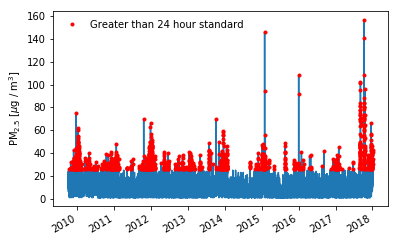

In [6]:
ax = df.plot(y='PM25', label='_nolegend_', legend=False)
df[df.PM25 > 25].plot(y='PM25', color='r', marker='.', linestyle='None', label='Greater than 24 hour standard', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('PM$_{2.5}$ [$\mu$g / m$^3$]')
plt.legend(frameon=False)
plt.savefig('fig/pm25.png', dpi=300, bbox_inches='tight')

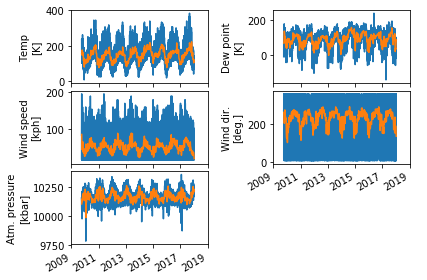

In [7]:
fig, ax = plt.subplots(3,2)
ax = ax.ravel()
variables = ['TMP', 'DEW', 'SPD', 'DIR', 'SLP']
labels = ['Temp\n[K]', 'Dew point\n[K]', 'Wind speed\n[kph]', 'Wind dir.\n[deg.]', 'Atm. pressure\n[kbar]']
xt = list(map(str, range(2009, 2020, 2)))
for variable, label, axis in zip(variables, labels, ax):
    df.plot(y=variable, legend=False, ax=axis)
    df.groupby(pd.TimeGrouper('W')).mean().plot(y=variable, legend=False, ax=axis)
    axis.set_xlabel('')
    axis.set_ylabel(label)
    axis.set_xticks(xt)
for i in [0, 1, 2]:
    ax[i].set_xticklabels([])
ax[3].set_xticks(xt)
ax[4].set_xticks(xt)
ax[-1].axis('off')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('fig/weather.png', dpi=300, bbox_inches='tight')

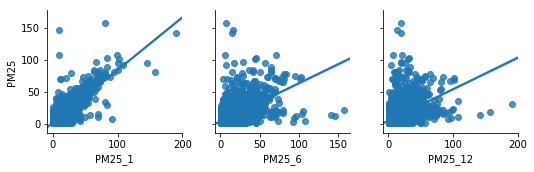

In [8]:
sns.pairplot(kind='reg', x_vars=['PM25_1', 'PM25_6', 'PM25_12'], y_vars='PM25', data=df)
plt.savefig('fig/lagplot.png', dpi=300, bbox_inches='tight')

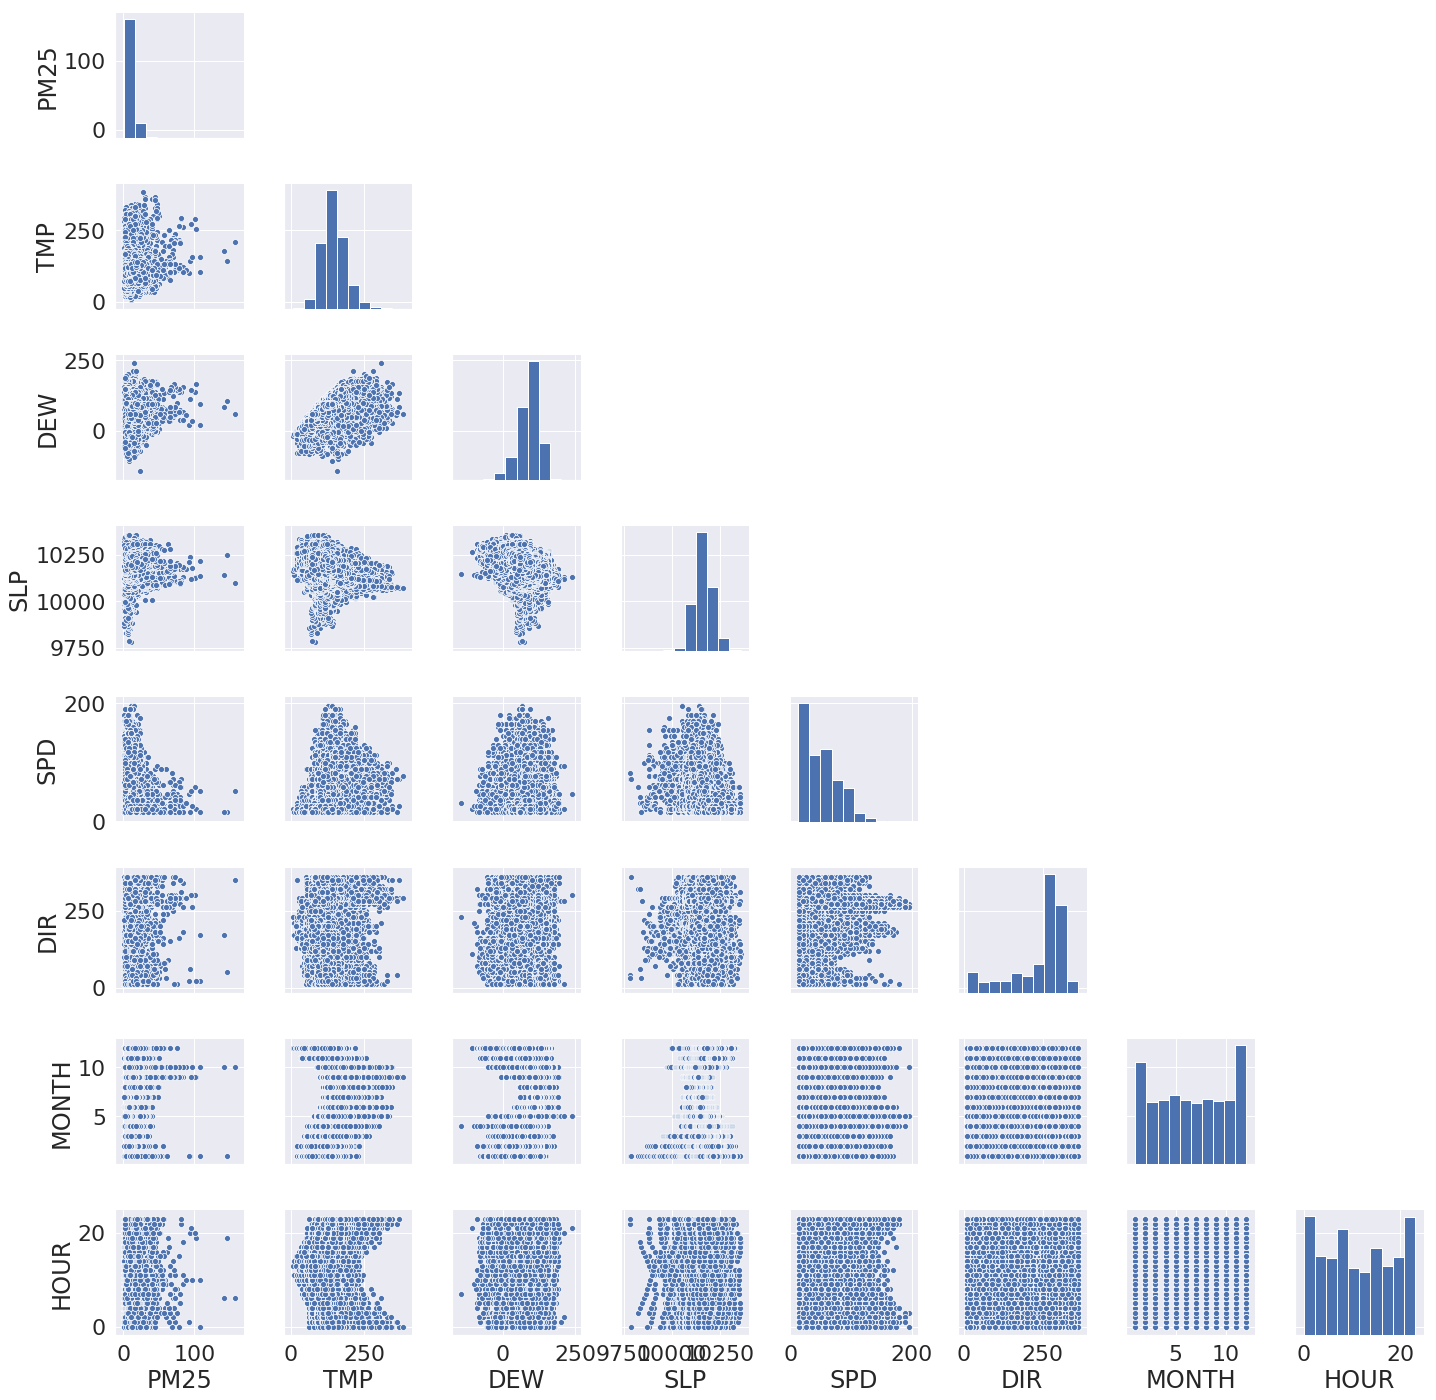

In [9]:
sns.set(font_scale=2)
g = sns.pairplot(vars=['PM25', 'TMP', 'DEW', 'SLP', 'SPD', 'DIR', 'MONTH', 'HOUR'], data=df)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.savefig('fig/pairplot.png', dpi=300, bbox_inches='tight')

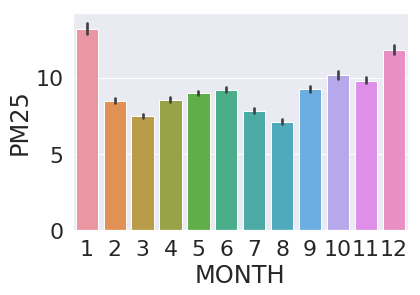

In [10]:
sns.barplot(x='MONTH', y='PM25', data=df)